In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

from scipy.interpolate import  griddata
import h5py


In [2]:
steps = [15,22,23,30,37,38,45,52,60,67,75,90,105,120,135,150,165,172,180,187,195,202,210,217,225,232,240,247,255,262,270,277,285,292,300,307,315,322,323,330,337,338,345,352,353,360,367,368,375,382,383,390,397,398,405,412,413,420,427,428,435,442,443,450,457,458,465,472,473,480,487,488,495,502,503,510,517,518,525,532,533,540,547,548,555,562,563,570,577,578,585,592,593,600,607,608,615,622,623,630,637,638,645,652,660,667,675,682,690,697,705,712,720,727,735,742,750,757,765,772,780,787,795,802,810,817,825,832,840,847,855,862,870,877,885,892,900,907,915,922,930,937,945,952,960,967,975,982,990,997,1005,1012,1020,1027,1035,1042,1050,1057,1065,1072,1080,1087,1095,1102,1110,1117,1125,1132,1140,1147,1155,1162,1170,1177,1185,1192,1200,1207,1215,1222,1230,1237,1245,1252,1260,1267,1275,1290,1305,1320,1335,1350,1365,1380,1395,1410,1425,1440,1455,1470,1485]
times = np.asarray(steps)*.2

In [3]:
times.shape

(201,)

In [4]:
tan= -0.035 
cos = 1/(1+tan)**.5
sin = tan/(1+tan)**.5

rot = np.asarray([[cos,-sin,0],[sin,cos,0],[0,0,1]])

In [13]:
a = pd.read_csv(f"richter/export_ts_15.csv",skiprows=5)
a.iloc[:,:3] = np.einsum( 'ni,ij->nj',a.iloc[:,:3], rot )
b=a[(a['X [ m ]']>19.23734) & (a[' Z [ m ]']<5.3) & (a['X [ m ]'] < 194.98135)]
# b = a[a['X [ m ]']>0.02]
# b = b[b[' Z [ m ]']<5.3]
xy=b[['X [ m ]',' Z [ m ]']].to_numpy()


In [5]:
uv = []
vel = []
for s in steps:
    filnamn = f"richter/export_ts_{s}.csv"
    a = pd.read_csv(filnamn,skiprows=5)
    a.iloc[:,:3] = np.einsum( 'ni,ij->nj',a.iloc[:,:3], rot )
    a.iloc[:,4:7] = np.einsum( 'ni,ij->nj',a.iloc[:,4:7], rot )
    b=a[(a['X [ m ]']>19.23734) & (a[' Z [ m ]']<5.3) & (a['X [ m ]'] < 194.98135)]
    uv.append(b[[' Velocity u [ m s^-1 ]',' Velocity w [ m s^-1 ]']].to_numpy())
    vel.append(b[' Velocity [ m s^-1 ]'].to_numpy())
# a.to_csv("csv/export_ts_15_transformed.csv",sep=";",encoding='cp1252')
vel = np.asarray(vel)
uv = np.asarray(uv)

In [14]:


with h5py.File("richter.hdf5", 'w') as f:
    f.create_dataset("x", data=xy, compression="gzip", compression_opts=9)
    f.create_dataset("U", data=uv, compression="gzip", compression_opts=9)
    f.create_dataset("t", data=np.asarray(times), compression="gzip", compression_opts=9)
    # f.attrs.create('I', data=I)
    # f.attrs.create('J', data=J)

In [15]:
x,y = np.mgrid[0:250:1000j,-25:6:124j]

myDPI  =150
length = 250
pts = length * 76
for i in range(times.shape[0]):
    resampled=griddata((xy), vel[i],(x,y), method='linear') # np.linalg.norm(uv[i],axis=1)
    fig,ax = plt.subplots(figsize=(1920/myDPI,1080/myDPI),dpi=myDPI)
    ax.imshow(resampled.T[:,:pts],extent=(0,length,-25,6),origin='lower')
    # plt.show()
    fig.savefig(f"richter/flow{i:03d}.png")
    plt.close()

In [13]:
b

,X [ m ],Y [ m ],Z [ m ],Velocity [ m s^-1 ],Velocity u [ m s^-1 ],Velocity v [ m s^-1 ],Velocity w [ m s^-1 ],Velocity.Curl [ s^-1 ]
0,33.068421,-1.323365e-08,-7.094665,0.820494,-0.671141,-0.477157,0.140124,0.374190
1,32.956006,-7.482103e-08,-7.133069,0.817196,-0.671017,-0.474287,0.130487,0.277478
2,33.051418,1.781453e-08,-7.024302,0.795150,-0.642906,-0.468872,0.148331,0.457478
3,33.157884,-1.079052e-07,-7.234164,0.853046,-0.713466,-0.478853,0.126759,0.180647
4,32.949490,2.443136e-08,-7.199616,0.828370,-0.686980,-0.473899,0.121972,0.175804
...,...,...,...,...,...,...,...,...
79580,22.531600,9.619847e-08,-5.489270,0.221046,-0.207591,0.079899,0.034258,51.724796
79581,22.406083,3.970095e-08,-5.468462,0.208928,-0.195192,0.078286,0.031978,49.086315
79582,21.870439,-3.970095e-08,-5.379663,0.170103,-0.145302,0.091158,0.024019,40.765373
79583,22.040225,-6.107839e-09,-5.407811,0.180697,-0.160944,0.085046,0.026729,42.964901


(10.45015906333601, 203.76835983346598, -12.0064576815, 5.8693889115)

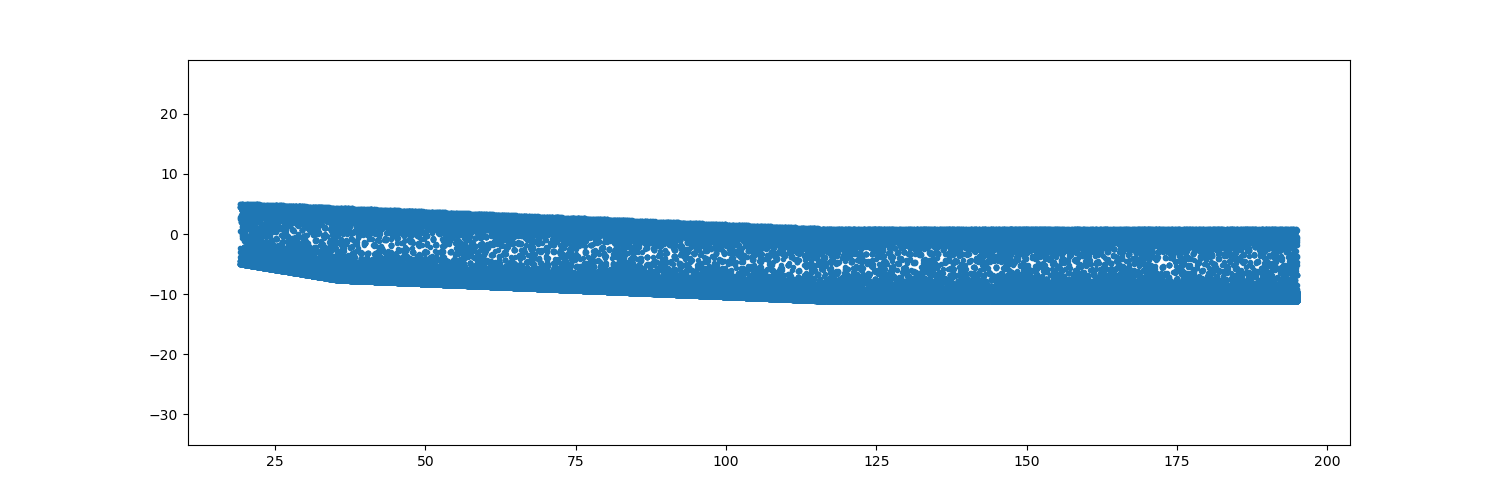

In [12]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(b.iloc[:,0],b.iloc[:,2],'.')
ax.axis('equal')

In [7]:
golv = pd.read_csv("richter/export_golv.csv",skiprows=5)
# golv.iloc[:,:3] = 
golv.iloc[:,:3] = np.einsum( 'ni,ij->nj',golv.iloc[:,:3], rot )
golv = golv[['X [ m ]',' Z [ m ]']]
golv = golv[golv[' Z [ m ]']<2]

(-9.749170455368963, 204.73257956858825, -11.5790297, -3.1152843)

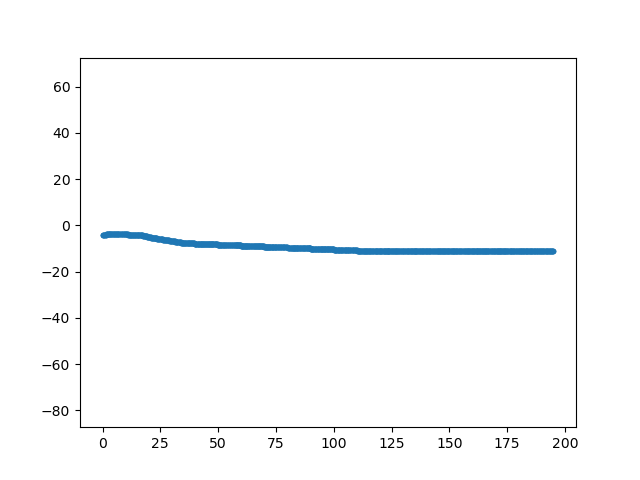

In [8]:
fig,ax =plt.subplots()
ax.plot(golv['X [ m ]'],golv[' Z [ m ]'],'.')
ax.axis('equal')

In [30]:
with h5py.File("richter.hdf5", 'r') as f:
    xy = np.asarray(f['x'])
    uv= np.asarray(f['U'])
    t= np.asarray(f["t"])

txy = np.column_stack((np.repeat(t,xy.shape[0]),np.tile(xy,(len(t),1))))

u = uv[:,:,0]
v = uv[:,:,1]
u_r=u.ravel()
v_r = v.ravel()
uv_ny = np.stack((u_r,v_r),1)

In [39]:
from scipy.spatial import KDTree
from datagenerering import lagra_tre, tre_objekt

tree = KDTree(txy)
tre_obj = tre_objekt(tree, uv_ny)
lagra_tre(tre_obj, "richter.pickle")